# Exploratory Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### I. Getting to Know a Dataset

#### Dataset

This dataset is about the unemployment rate for 11 years of each country i.e. from the year 2010-2021

In [ ]:
unemployment = pd.read_csv('clean_unemployment.csv')
unemployment.head()

#### Histogram

Create a histogram of 2021 unemployment; show a full percent in each bin

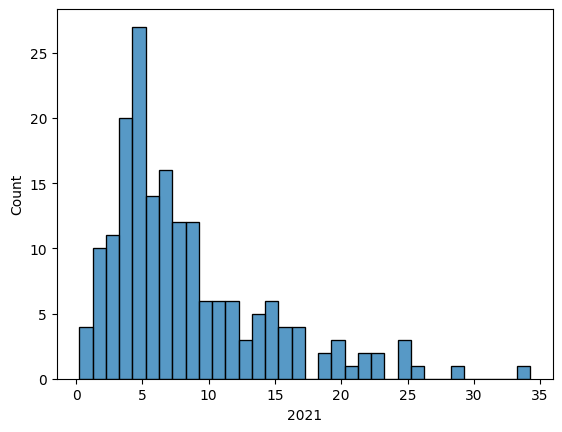

In [4]:
sns.histplot(data = unemployment, x = '2021', binwidth = 1)
plt.show()

#### View data type

In [6]:
unemployment.dtypes

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

#### Filter by boolean series

Define a series describing whether each continent is outside of Oceania

In [7]:
not_oceania = ~unemployment['continent'].isin(['Oceania'])

Print unemployment without records related to countries in Oceania

In [8]:
unemployment[not_oceania]

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,VNM,Vietnam,Asia,1.11,1.00,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
178,YEM,"Yemen, Rep.",Asia,12.83,13.23,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
179,ZAF,South Africa,Africa,24.68,24.64,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
180,ZMB,Zambia,Africa,13.19,10.55,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


#### Box plot

Create a boxplot of 2021 unemployment rates, broken down by continent

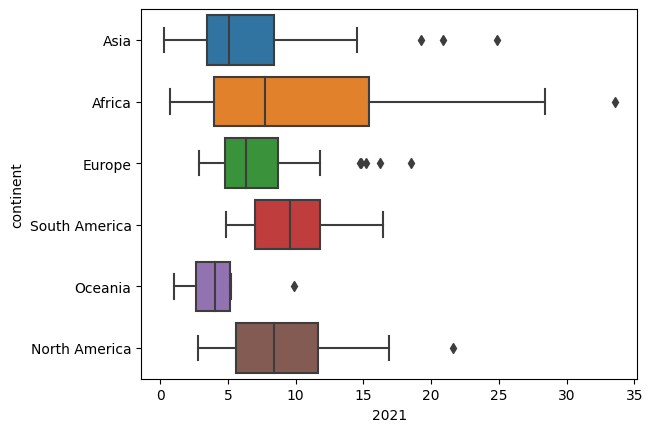

In [9]:
sns.boxplot(data = unemployment, x = '2021', y = 'continent')
plt.show()

#### Some statistics

Create the `mean_rate_2021` and `std_rate_2021` columns

In [10]:
continent_summary = unemployment.groupby("continent").agg(
    mean_rate_2021 = ('2021','mean'),
    std_rate_2021 = ('2021','std'),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


#### Bar plot

Create a bar plot of continents and their average unemployment

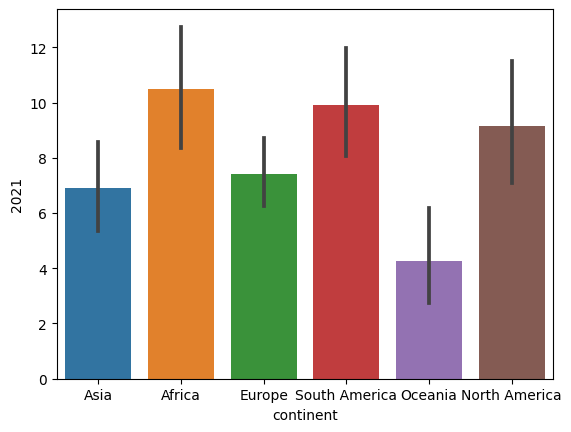

In [11]:
sns.barplot(data = unemployment,x = 'continent',y = '2021')
plt.show()

### II. Data Cleaning and Imputation

#### Dataset

This dataset contains detailed information about flights

In [33]:
planes = pd.read_csv('planes.csv')
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


#### Clean missing values

Count missing values by columns

In [34]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

Find the five percent threshold

In [35]:
threshold = len(planes) * 0.05

Create a filter

In [36]:
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

Drop missing values for columns below the threshold

In [37]:
planes.dropna(subset = cols_to_drop, inplace = True)
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

#### Box plot

Create a box plot of Price by Airline

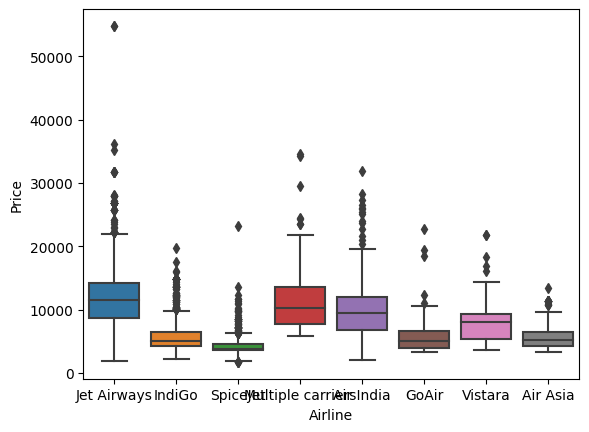

In [38]:
sns.boxplot(data = planes, x = 'Airline', y = 'Price')
plt.show()

#### Impute missing values

Calculate median plane ticket prices by Airline

In [39]:
airline_prices = planes.groupby("Airline")["Price"].median()

Convert to a dictionary

In [40]:
prices_dict = airline_prices.to_dict()

Map the dictionary to missing values of Price by Airline and check for missing values

In [41]:
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price                0
dtype: int64

### III. Categorical Data

Filter the DataFrame for object columns and loop through columns

In [42]:
non_numeric = planes.select_dtypes("object")
 
for col in non_numeric.columns:
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9


Create a list of categories and `short_flights`, `medium_flights`, `long_flights`

In [43]:
flight_categories = ["Short-haul", "Medium", "Long-haul"]

short_flights = "^0h|^1h|^2h|^3h|^4h"
medium_flights = "^5h|^6h|^7h|^8h|^9h"
long_flights = "10h|11h|12h|13h|14h|15h|16h"

Create conditions for values in flight_categories to be created and apply the conditions list to the flight categories

In [44]:
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default = "Extreme duration")

Plot the counts of each category

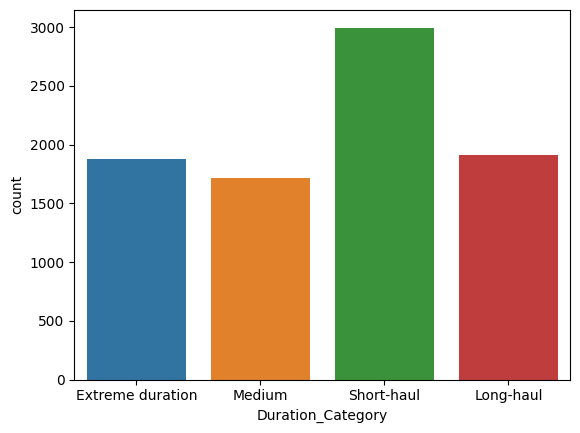

In [45]:
sns.countplot(data=planes, x="Duration_Category")
plt.show()

### IV. Numerical Data

In [46]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,Long-haul


Remove the string character and convert to float data type

In [47]:
planes["Duration"] = planes["Duration"].str.replace("h", "")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", ".")
planes["Duration"] = planes["Duration"].astype(float)

See the change in the `Duration` column

In [48]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,No info,13882.0,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.25,1 stop,No info,6218.0,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.45,1 stop,No info,13302.0,Short-haul
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.25,non-stop,No info,3873.0,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.30,1 stop,In-flight meal not included,11087.0,Long-haul


Plot a histogram

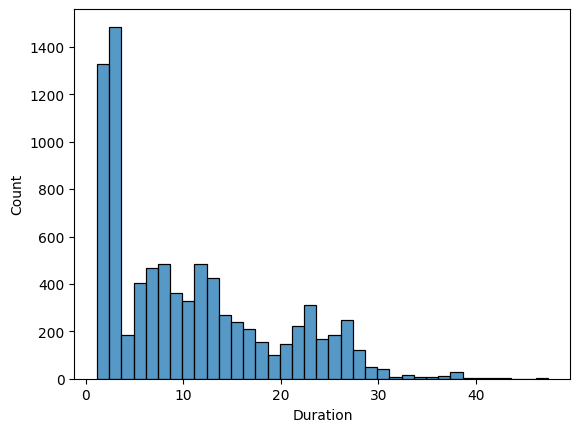

In [49]:
sns.histplot(data = planes,x = 'Duration')
plt.show()

#### Lambda expressions

Price standard deviation by Airline

In [50]:
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())
planes[["Airline", "airline_price_st_dev"]].value_counts()

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
dtype: int64

Median Duration by Airline

In [51]:
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())
planes[["Airline","airline_median_duration"]].value_counts()

Airline            airline_median_duration
Jet Airways        13.20                      3082
IndiGo             2.55                       1632
Air India          15.50                      1399
Multiple carriers  10.15                       959
SpiceJet           2.30                        653
Vistara            3.10                        376
Air Asia           2.50                        260
GoAir              2.55                        147
dtype: int64

Mean Price by Destination

In [52]:
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())
planes[["Destination","price_destination_mean"]].value_counts()

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
dtype: int64

### V. Handling Outliers

Plot a histogram of flight prices (Look at the right tail)

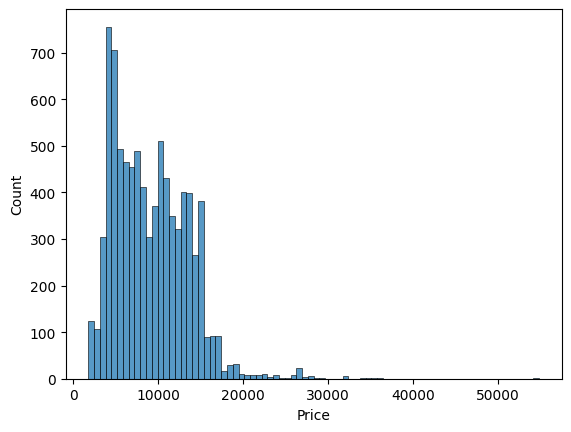

In [53]:
sns.histplot(data = planes,x = 'Price')
plt.show()

#### Interquartile range

Find the 75th and 25th percentiles

In [54]:
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

Calculate iqr and the thresholds

In [55]:
prices_iqr = price_seventy_fifth - price_twenty_fifth

upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

Subset the data

In [56]:
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]
planes["Price"].describe()

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64

### VI. Date Time Data

#### Dataset

This dataset contains data related to marriage and divorce

In [57]:
divorce = pd.read_csv('divorce.csv', parse_dates = ['divorce_date','dob_man','dob_woman','marriage_date'])
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


Look at the data types

In [32]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

#### Time series plot

Define the `marriage_year` column and create a line plot showing the average number of kids by year

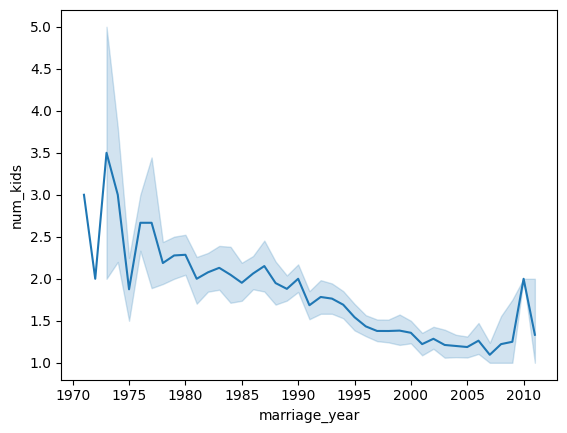

In [58]:
divorce["marriage_year"] = divorce['marriage_date'].dt.year

sns.lineplot(data = divorce,x = 'marriage_year',y = 'num_kids')
plt.show()

### VII. Correlation plots

Create the scatterplot of `marriage_duration` vs `num_kids`

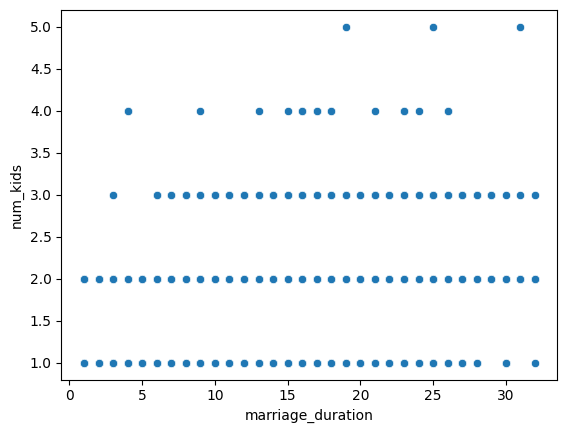

In [59]:
sns.scatterplot(data = divorce, x = 'marriage_duration',y = 'num_kids')
plt.show()

#### Pair plot

Create a pairplot for `income_woman` and `marriage_duration`

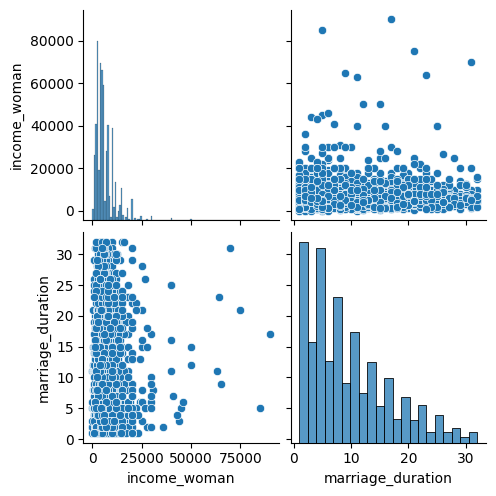

In [60]:
sns.pairplot(data = divorce, vars = ['income_woman','marriage_duration'])
plt.show()

#### KDE plot

Create the KDE plot of `marriage_duration` by `num_kids`

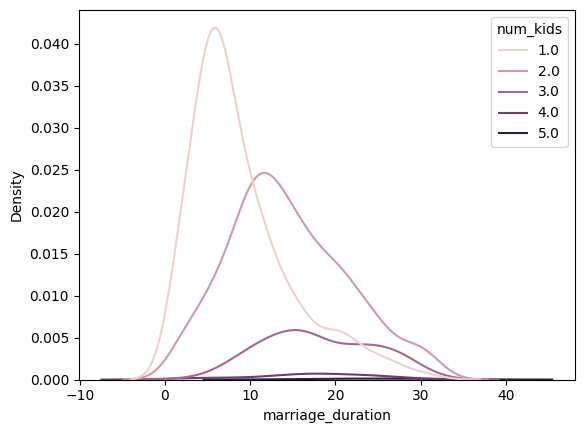

In [61]:
sns.kdeplot(data = divorce, x = 'marriage_duration', hue = 'num_kids')
plt.show()

Same plot but cut in 0

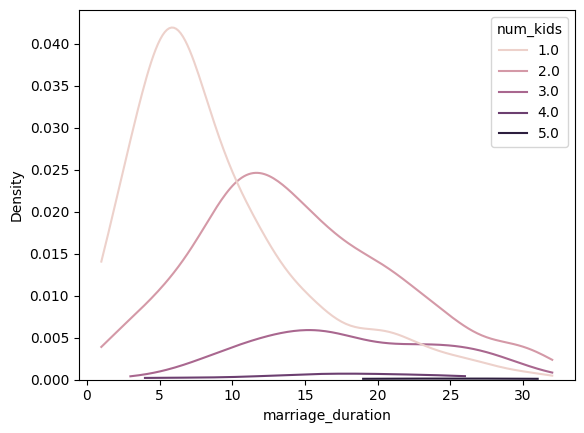

In [62]:
sns.kdeplot(data = divorce, x = 'marriage_duration', hue = 'num_kids', cut = 0)
plt.show()

Update the KDE plot to show a cumulative distribution function

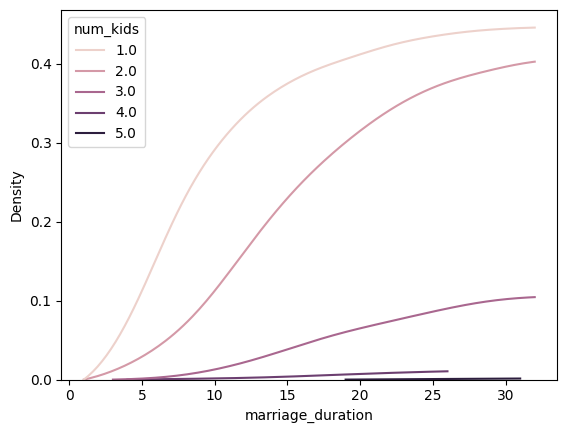

In [63]:
sns.kdeplot(data = divorce, x = "marriage_duration", hue = "num_kids", cut = 0, cumulative = True)
plt.show()

### VIII. Considerations for categorical data

#### Dataset

This dataset contains information on salaries for data science professionals, in different geographic regions, with different levels of experience in different industries

In [64]:
salaries = pd.read_csv('ds_salaries_clean.csv')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


#### Imbalance class

Relative frequency of Job Category

In [65]:
salaries['Designation'].value_counts(normalize=True)

Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager                    0.

#### Cross Tabular

Cross-tabulate `Company_Size` and `Experience`

In [67]:
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


Cross-tabulate `Job_Category` and `Company_Size`

In [68]:
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"]))

Company_Size                               L   M   S
Designation                                         
3D Computer Vision Researcher              0   1   0
AI Scientist                               2   2   3
Analytics Engineer                         0   4   0
Applied Data Scientist                     5   0   0
Applied Machine Learning Scientist         2   2   0
BI Data Analyst                            2   2   2
Big Data Architect                         0   1   0
Big Data Engineer                          4   2   2
Business Data Analyst                      4   1   0
Cloud Data Engineer                        1   0   1
Computer Vision Engineer                   0   4   2
Computer Vision Software Engineer          0   1   2
Data Analyst                              13  76   8
Data Analytics Engineer                    2   2   0
Data Analytics Lead                        1   0   0
Data Analytics Manager                     2   5   0
Data Architect                             3  

Cross-tabulate `Job_Category` and `Company_Size` by mean of `Salary_USD`

In [70]:
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"],
            values = salaries["Salary_USD"], aggfunc = "mean"))

Company_Size                                          L              M  \
Designation                                                              
3D Computer Vision Researcher                       NaN    5165.000000   
AI Scientist                              121741.500000   63019.000000   
Analytics Engineer                                  NaN  167096.000000   
Applied Data Scientist                    167721.400000            NaN   
Applied Machine Learning Scientist        237754.000000   33550.500000   
BI Data Analyst                            88923.000000   94528.500000   
Big Data Architect                                  NaN   95200.000000   
Big Data Engineer                          27384.750000   80695.000000   
Business Data Analyst                      87132.000000   17609.000000   
Cloud Data Engineer                        85261.000000            NaN   
Computer Vision Engineer                            NaN   42467.750000   
Computer Vision Software Engineer     

#### Generating New Features

Find the 25th percentile, save the median and gather the 75th percentile

In [71]:
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
salaries_median = salaries["Salary_USD"].median()
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


Create salary labels with range list

In [72]:
salary_labels = ["entry", "mid", "senior", "exec"]
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins = salary_ranges,
                                  labels = salary_labels)

Plot the count of salary levels at companies of different sizes

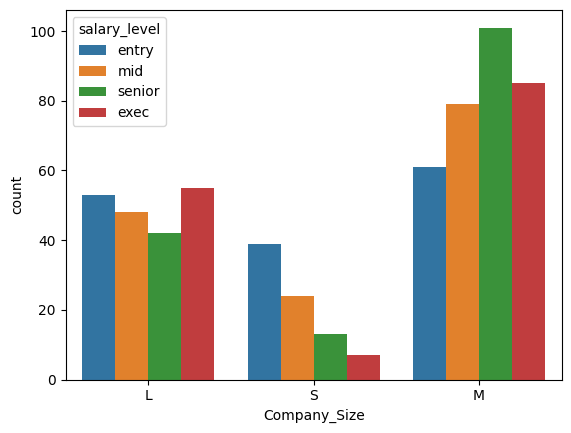

In [73]:
sns.countplot(data = salaries, x = "Company_Size", hue = "salary_level")
plt.show()